# High Growth Real Estate Opportunities
### Using historical data and trends from 1998-2018 to identify upside potential for an investment.
#### Report Generated by Matthew Pucci

In [1]:
!pip install folium

In [ ]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import statsmodels.api as sm
import statistics as stats
from matplotlib.pylab import rcParams
from pandas import Grouper
from collections import Counter
plt.style.use('seaborn-bright')
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import log
import folium
import json


import warnings
warnings.filterwarnings('ignore')

### We installed Folium with anticipation of using it alongside a Choropleth layer diagram later in the analysis.  Lets now take a preliminary look at the Zillow Data CSV file we are using for this research.

In [3]:
df=pd.read_csv('zillow_data.csv')

In [4]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [6]:
pd.to_datetime(df.columns.values[7:], format='%Y-%m')

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [7]:
df.isna().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
CountyName       0
SizeRank         0
1996-04       1039
1996-05       1039
1996-06       1039
1996-07       1039
1996-08       1039
1996-09       1039
1996-10       1039
1996-11       1039
1996-12       1039
1997-01       1039
1997-02       1039
1997-03       1039
1997-04       1039
1997-05       1039
1997-06       1039
1997-07       1038
1997-08       1038
1997-09       1038
1997-10       1038
1997-11       1038
1997-12       1038
1998-01       1036
1998-02       1036
              ... 
2015-11          0
2015-12          0
2016-01          0
2016-02          0
2016-03          0
2016-04          0
2016-05          0
2016-06          0
2016-07          0
2016-08          0
2016-09          0
2016-10          0
2016-11          0
2016-12          0
2017-01          0
2017-02          0
2017-03          0
2017-04          0
2017-05          0
2017-06          0
2017-07          0
2017-08     

In [8]:
df.Metro

0                               Chicago
1                     Dallas-Fort Worth
2                               Houston
3                               Chicago
4                               El Paso
5                               Houston
6                              New York
7                               Chicago
8                               Houston
9                         San Francisco
10                             New York
11                         The Villages
12                             New York
13                             New York
14                            Nashville
15       Los Angeles-Long Beach-Anaheim
16                              Chicago
17                            Nashville
18                               Austin
19                              Chicago
20                             New York
21                             New York
22                              Houston
23                              Houston
24                            Charlotte


In [9]:
pd.to_datetime(df.columns.values[7:], format='%Y-%m')

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [10]:
df.isna().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
CountyName       0
SizeRank         0
1996-04       1039
1996-05       1039
1996-06       1039
1996-07       1039
1996-08       1039
1996-09       1039
1996-10       1039
1996-11       1039
1996-12       1039
1997-01       1039
1997-02       1039
1997-03       1039
1997-04       1039
1997-05       1039
1997-06       1039
1997-07       1038
1997-08       1038
1997-09       1038
1997-10       1038
1997-11       1038
1997-12       1038
1998-01       1036
1998-02       1036
              ... 
2015-11          0
2015-12          0
2016-01          0
2016-02          0
2016-03          0
2016-04          0
2016-05          0
2016-06          0
2016-07          0
2016-08          0
2016-09          0
2016-10          0
2016-11          0
2016-12          0
2017-01          0
2017-02          0
2017-03          0
2017-04          0
2017-05          0
2017-06          0
2017-07          0
2017-08     

In [11]:
def bull_zip(df, percent):
    increase = []
    intervals = []
    for row in range(len(df.RegionID)):
        zero = 0
        increasing = 0
        decreasing = 0
        zipcode = df.RegionName[row]
        for column in df.columns[7:]:
            one = df[column][row]
            if one > zero:
                increasing += 1
            else:
                decreasing += 1
            zero = one
        net = increasing - decreasing
        if net > 0:
            increase.append(zipcode)
            intervals.append(net)
    dic = {'Zipcode':increase, 'Appreciating_Intervals': intervals}
    increasedf = pd.DataFrame(dic)
    rank = percent * (len(df.columns) - 7)
    ziprank = increasedf.sort_values(by='Appreciating_Intervals', ascending=False)
    ziprank = ziprank[ziprank.Appreciating_Intervals >= rank]
    zips = list(ziprank['Zipcode'])
    return zips, ziprank
        

In [12]:
df2= df.copy

In [13]:
zips, ziprank = bull_zip(df, .7)

In [14]:
print('Top Appreciating Zipcodes in the United States')
ziprank

Top Appreciating Zipcodes in the United States


,Zipcode,Appreciating_Intervals
2740,37206,201
6045,37204,195
1357,80211,195
465,11216,195
1415,20003,195
4809,99502,191
1296,80210,189
2429,80521,189
6104,81101,187


### The above table gives us a decending list of the top appreciating zipcodes from 1996 to 2018.  We will look into specific zipcodes later in the analysis. 

In [15]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['SizeRank','RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted.set_index('time',inplace=True)
    melted.dropna(inplace=True)
    return melted

In [16]:
bullishdf = pd.DataFrame()
for z in zips:
    d = melt_data(df[df.RegionName==z])
    bullishdf = pd.concat([d, bullishdf])
bullishdf.head()

,SizeRank,RegionID,RegionName,City,State,Metro,CountyName,value
time,,,,,,,,
1996-04-01,2492,93445,80521,Fort Collins,CO,Fort Collins,Larimer,113900.0
1996-05-01,2492,93445,80521,Fort Collins,CO,Fort Collins,Larimer,114200.0
1996-06-01,2492,93445,80521,Fort Collins,CO,Fort Collins,Larimer,114400.0
1996-07-01,2492,93445,80521,Fort Collins,CO,Fort Collins,Larimer,114700.0
1996-08-01,2492,93445,80521,Fort Collins,CO,Fort Collins,Larimer,115000.0


In [17]:
df.dropna(inplace=True)

In [18]:
df.isna().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         0
CountyName    0
SizeRank      0
1996-04       0
1996-05       0
1996-06       0
1996-07       0
1996-08       0
1996-09       0
1996-10       0
1996-11       0
1996-12       0
1997-01       0
1997-02       0
1997-03       0
1997-04       0
1997-05       0
1997-06       0
1997-07       0
1997-08       0
1997-09       0
1997-10       0
1997-11       0
1997-12       0
1998-01       0
1998-02       0
             ..
2015-11       0
2015-12       0
2016-01       0
2016-02       0
2016-03       0
2016-04       0
2016-05       0
2016-06       0
2016-07       0
2016-08       0
2016-09       0
2016-10       0
2016-11       0
2016-12       0
2017-01       0
2017-02       0
2017-03       0
2017-04       0
2017-05       0
2017-06       0
2017-07       0
2017-08       0
2017-09       0
2017-10       0
2017-11       0
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int6

#### Lets take a look to see what States are represented in the zillow data set.

In [19]:
df.State.unique()

array(['IL', 'TX', 'NY', 'CA', 'FL', 'TN', 'NC', 'GA', 'DC', 'MO', 'OK',
       'AZ', 'NJ', 'MD', 'VA', 'WA', 'OH', 'MI', 'MA', 'KS', 'NM', 'CT',
       'NV', 'PA', 'CO', 'OR', 'IN', 'SC', 'KY', 'AR', 'MN', 'AL', 'DE',
       'LA', 'MS', 'ID', 'MT', 'HI', 'WI', 'UT', 'ME', 'SD', 'WV', 'IA',
       'RI', 'NE', 'WY', 'AK', 'NH', 'VT'], dtype=object)

In [20]:
print(len(df.State.unique()))

50


In [21]:
print(len(df.City.unique()))

6591


## This shows us that this dataset has 6,591 different cities in 50 different states. 

### Let's now look more in depth at property value growth in different states.


In [22]:
bull_state = df.groupby(['State']).mean()

### Since we have a sufficient identifier with the column, "State" we can drop some of the other region identifiers that are no longer necessary.  

In [23]:
bull_state.drop(['RegionID', 'RegionName', 'SizeRank'], axis=1, inplace=True)
bull_state.reset_index(inplace=True)

### Lets now look at the growth rate of the 50 states over the years.

In [24]:
bull_state['Growth 2008 to 2018'] = ((bull_state['2018-04'] - bull_state['2008-01'])/bull_state['2008-01'])*100
bull_state['Growth 1998 to 2008'] = ((bull_state['2008-01'] - bull_state['1998-01'])/bull_state['1998-01'])*100

In [25]:
print('Top Appreciating States in the United States')
bull_state.sort_values(by=['Growth 2008 to 2018'], ascending=False)[0:5]

Top Appreciating States in the United States


,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Growth 2008 to 2018,Growth 1998 to 2008
5,CO,146894.713656,147077.092511,147276.651982,147474.889868,147714.537445,147990.308370,148331.277533,148715.859031,149249.779736,...,396529.074890,398763.436123,401156.387665,404320.704846,407542.731278,411080.176211,415842.731278,419549.779736,40.537757,87.658051
7,DC,189216.666667,188611.111111,188011.111111,187438.888889,186900.000000,186494.444444,186222.222222,186116.666667,186305.555556,...,785277.777778,786261.111111,788122.222222,790450.000000,793622.222222,798838.888889,804600.000000,806166.666667,35.723372,204.239941
4,CA,202543.576389,202455.208333,202375.520833,202316.406250,202322.569444,202416.493056,202674.565972,203063.628472,203761.111111,...,728168.402778,734903.819444,741353.385417,748056.770833,754511.284722,760734.895833,767550.000000,771844.531250,34.846279,159.110235
28,NE,90313.432836,91131.343284,91891.044776,92592.537313,93200.000000,93717.910448,94153.731343,94473.134328,94831.343284,...,177244.776119,178153.731343,179013.432836,179985.074627,180968.656716,182147.761194,183946.268657,185456.716418,33.251831,41.380617
42,TX,114689.810427,114703.199052,114740.047393,114804.739336,114893.009479,114997.985782,115118.009479,115243.127962,115375.473934,...,203907.345972,204852.251185,205541.587678,206236.611374,206998.815166,208218.364929,209943.838863,211123.578199,32.829240,34.463987


### This table shows us that Colorado, Washington DC, California, Nebraska and Texas have appreciated the most from 1996 to 2018.  Lets visualize these results using an open source JSON file of US States pulled from Github.

In [26]:
import json

In [27]:
df.isna().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         0
CountyName    0
SizeRank      0
1996-04       0
1996-05       0
1996-06       0
1996-07       0
1996-08       0
1996-09       0
1996-10       0
1996-11       0
1996-12       0
1997-01       0
1997-02       0
1997-03       0
1997-04       0
1997-05       0
1997-06       0
1997-07       0
1997-08       0
1997-09       0
1997-10       0
1997-11       0
1997-12       0
1998-01       0
1998-02       0
             ..
2015-11       0
2015-12       0
2016-01       0
2016-02       0
2016-03       0
2016-04       0
2016-05       0
2016-06       0
2016-07       0
2016-08       0
2016-09       0
2016-10       0
2016-11       0
2016-12       0
2017-01       0
2017-02       0
2017-03       0
2017-04       0
2017-05       0
2017-06       0
2017-07       0
2017-08       0
2017-09       0
2017-10       0
2017-11       0
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int6

### In order to properly utilize Folium and Choropleth to its full potential, it is essential to import json and take advantage of an open source file combining the geographic coordinates with the names of each city. 

In [28]:
import json
import requests

In [29]:
state = df.groupby(['State']).mean()

In [30]:
state.drop(['RegionID', 'RegionName', 'SizeRank'], axis=1, inplace=True)
# Reset the index
state.reset_index(inplace=True)
# Compute % growth across the two specified periods
state['Growth 2008 to 2018'] = ((state['2018-04'] - state['2008-01'])/state['2008-01'])*100
state['Growth 1998 to 2008'] = ((state['2008-01'] - state['1998-01'])/state['1998-01'])*100

In [31]:
url='https://raw.githubusercontent.com/python-visualization/folium/master/tests/us-states.json'

In [32]:
state_geo = json.loads(requests.get(url).text)

In [33]:
state_geo

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 'AL',
   'properties': {'name': 'Alabama'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-87.359296, 35.00118],
      [-85.606675, 34.984749],
      [-85.431413, 34.124869],
      [-85.184951, 32.859696],
      [-85.069935, 32.580372],
      [-84.960397, 32.421541],
      [-85.004212, 32.322956],
      [-84.889196, 32.262709],
      [-85.058981, 32.13674],
      [-85.053504, 32.01077],
      [-85.141136, 31.840985],
      [-85.042551, 31.539753],
      [-85.113751, 31.27686],
      [-85.004212, 31.003013],
      [-85.497137, 30.997536],
      [-87.600282, 30.997536],
      [-87.633143, 30.86609],
      [-87.408589, 30.674397],
      [-87.446927, 30.510088],
      [-87.37025, 30.427934],
      [-87.518128, 30.280057],
      [-87.655051, 30.247195],
      [-87.90699, 30.411504],
      [-87.934375, 30.657966],
      [-88.011052, 30.685351],
      [-88.10416, 30.499135],
      [-88.137022, 30.318396],
    

### Lets first create a folium map with a choropleth layer of Appreciation/Depreciation rates of houses from 1998 to 2008.

In [34]:
X = folium.Map(location=[48, -102], zoom_start=4)
columns=[]
# Now, using a choropleth the folium map will shade each state with a shade of Orange or Red using the ColorBrew code OrRD in correspondance with price growth 1998 to 2008
X.choropleth(geo_data=state_geo, data=state, columns=['State', 'Growth 1998 to 2008'], 
              key_on='feature.id', fill_color='OrRd', fill_opacity=0.7, line_opacity=0.2, 
              legend_name='Average State Appreciation/Depreciation Rate (%) from 1998-2008', title='United States Heat Map')

X

### Now lets compare that to a visaulization of appreciation/depreciation rates from 2008-2018.

In [35]:
X1 = folium.Map(location=[48, -102], zoom_start=4)
columns=[]
# Now, using a choropleth the folium map will shade each state with a shade of Orange or Red using the ColorBrew code OrRD in correspondance with price growth 1998 to 2008
X1.choropleth(geo_data=state_geo, data=state, columns=['State', 'Growth 2008 to 2018'], 
              key_on='feature.id', fill_color='OrRd', fill_opacity=0.7, line_opacity=0.2, 
              legend_name='Average State Appreciation/Depreciation Rate (%) from 2008-2018', title='United States Heat Map')

X1

## EDA Visualizations and ADF Test

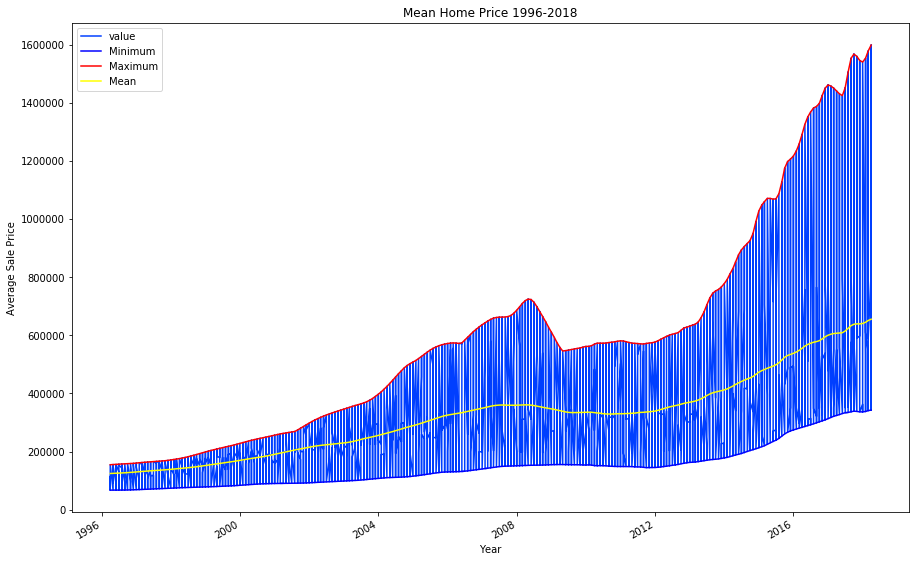

In [36]:
bullishdf.value.plot(figsize=(15,10))
minimum = bullishdf.groupby('time').aggregate({'value':'min'})
maximum = bullishdf.groupby('time').aggregate({'value':'max'})
mean = bullishdf.groupby('time').aggregate({'value':'mean'})
plt.plot(minimum, color='blue', label='Minimum')
plt.plot(maximum, color='red', label='Maximum')
plt.plot(mean, color='yellow', label='Mean')
plt.legend()
plt.title('Mean Home Price 1996-2018')
plt.ylabel('Average Sale Price')
plt.xlabel('Year')
plt.show()

#### ADF Test to see if we our time series shows stationarity.

In [37]:
 groupzip1 = bullishdf.RegionName.sort_values().unique()

In [38]:
for z in groupzip1:
    df_z = bullishdf[bullishdf.RegionName == z]
    result = adfuller(df_z.value.dropna())
    print('Zipcode: ', z)
    print('Augemented Dickey Fuller Test Stat: %f' % result[0])
    print('P-value: %f' % result[1])

Zipcode:  11216
Augemented Dickey Fuller Test Stat: 0.203156
P-value: 0.972438
Zipcode:  20003
Augemented Dickey Fuller Test Stat: -1.351554
P-value: 0.605269
Zipcode:  37204
Augemented Dickey Fuller Test Stat: -0.192801
P-value: 0.939374
Zipcode:  37206
Augemented Dickey Fuller Test Stat: -0.537058
P-value: 0.884580
Zipcode:  80210
Augemented Dickey Fuller Test Stat: 0.789878
P-value: 0.991471
Zipcode:  80211
Augemented Dickey Fuller Test Stat: 1.385263
P-value: 0.997046
Zipcode:  80521
Augemented Dickey Fuller Test Stat: 0.196868
P-value: 0.972085
Zipcode:  99502
Augemented Dickey Fuller Test Stat: -1.734797
P-value: 0.413279


### The ADF test as well as the P-Value shows us that this time series model is not stationary.  The above test shows some initial insight into the stregnth the data's relationships, but lets dive deeper with a ACF and PACF visualization of the difference and autocorelation. 

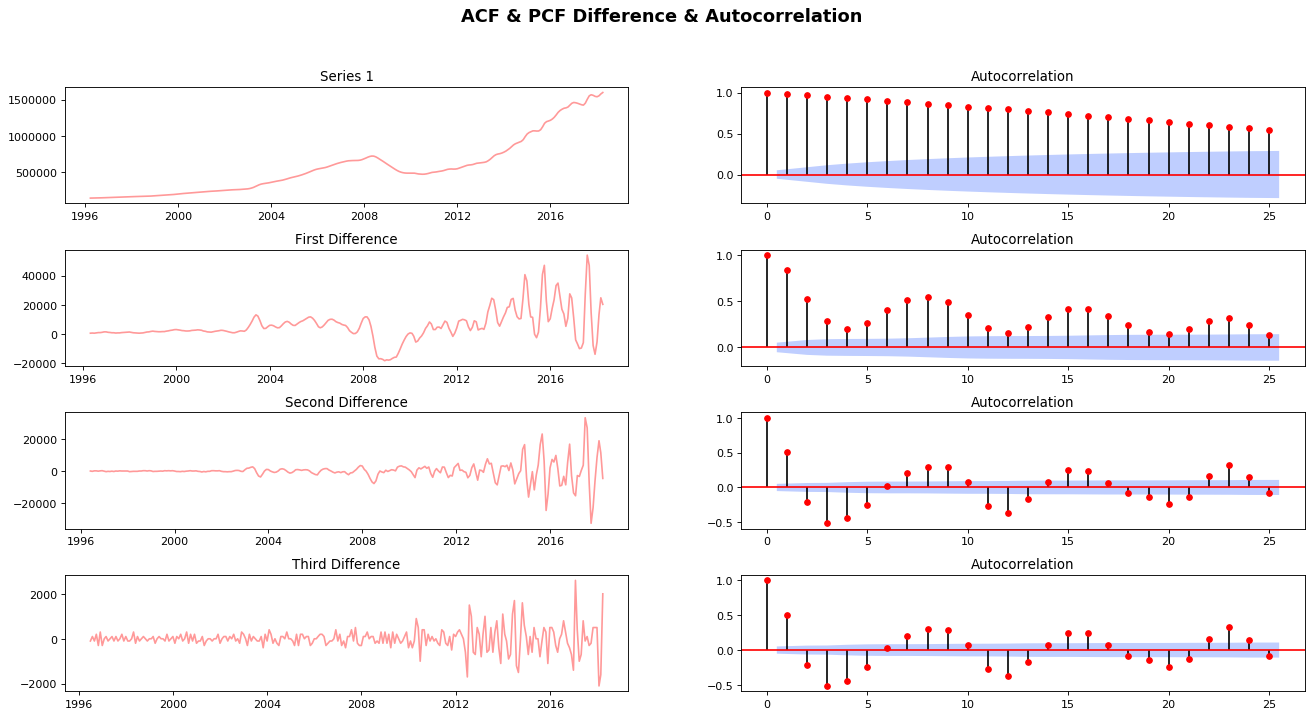

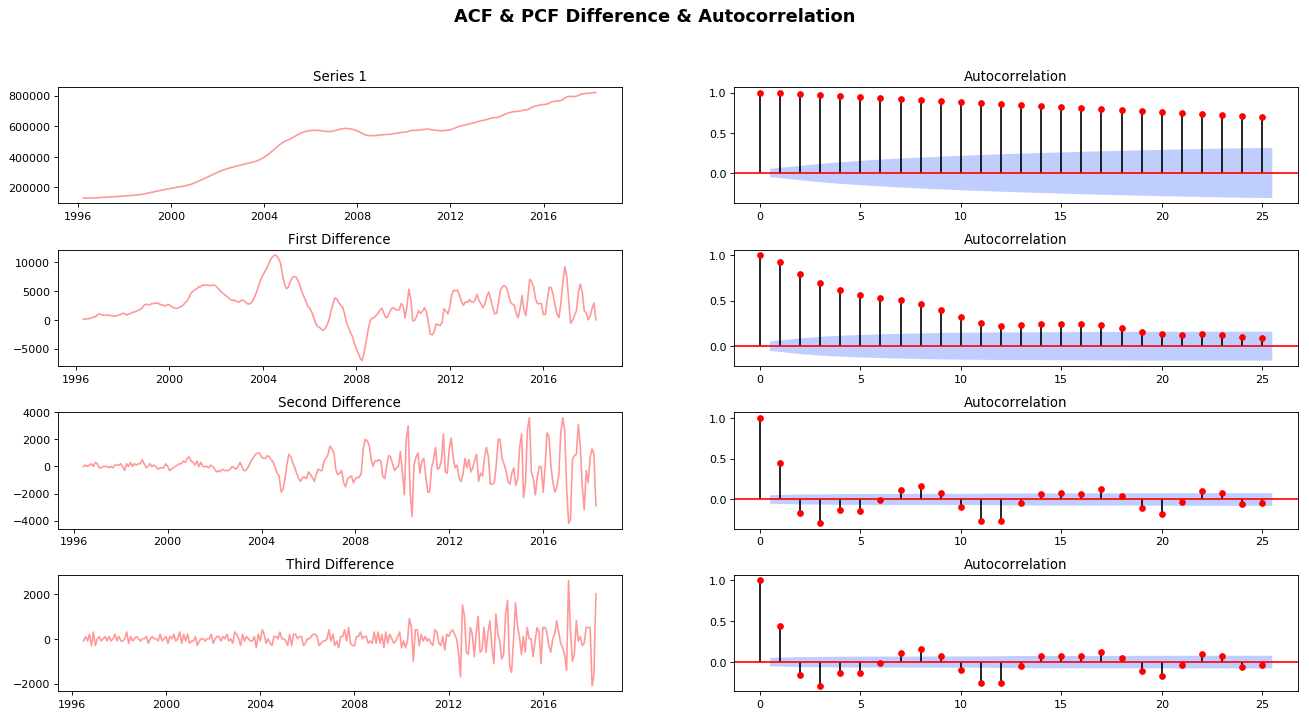

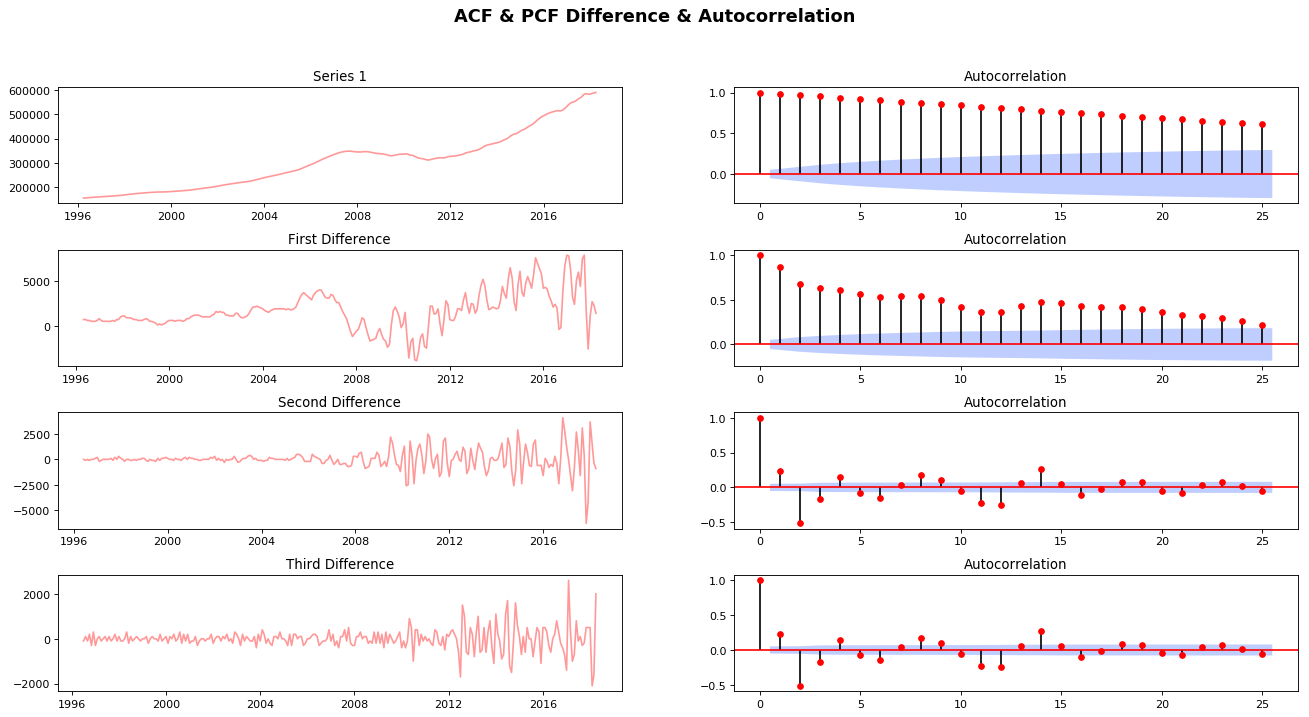

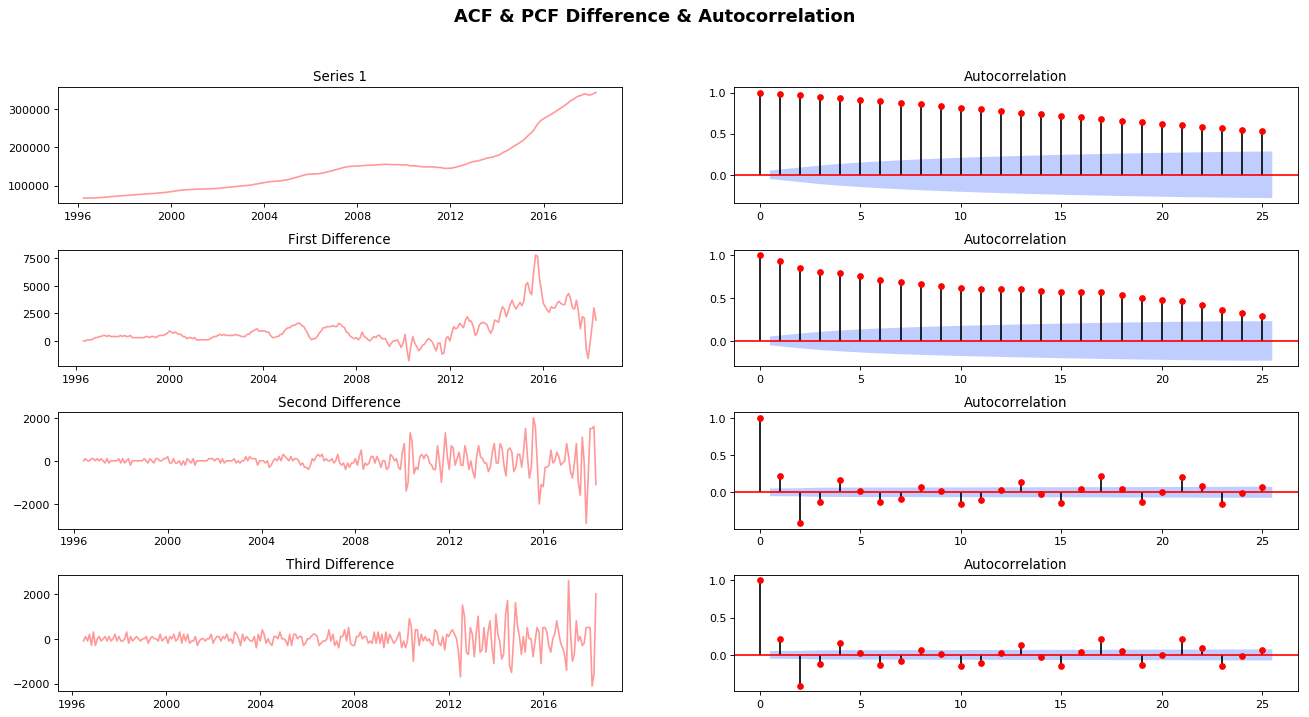

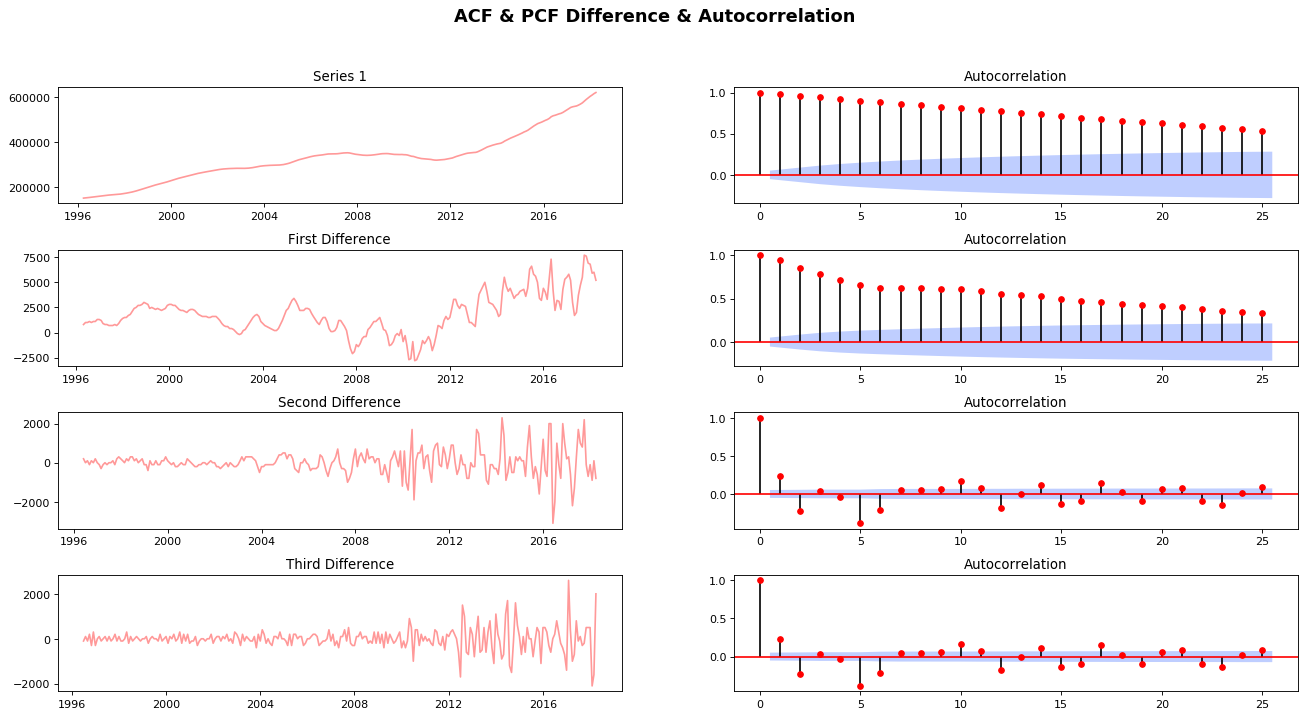

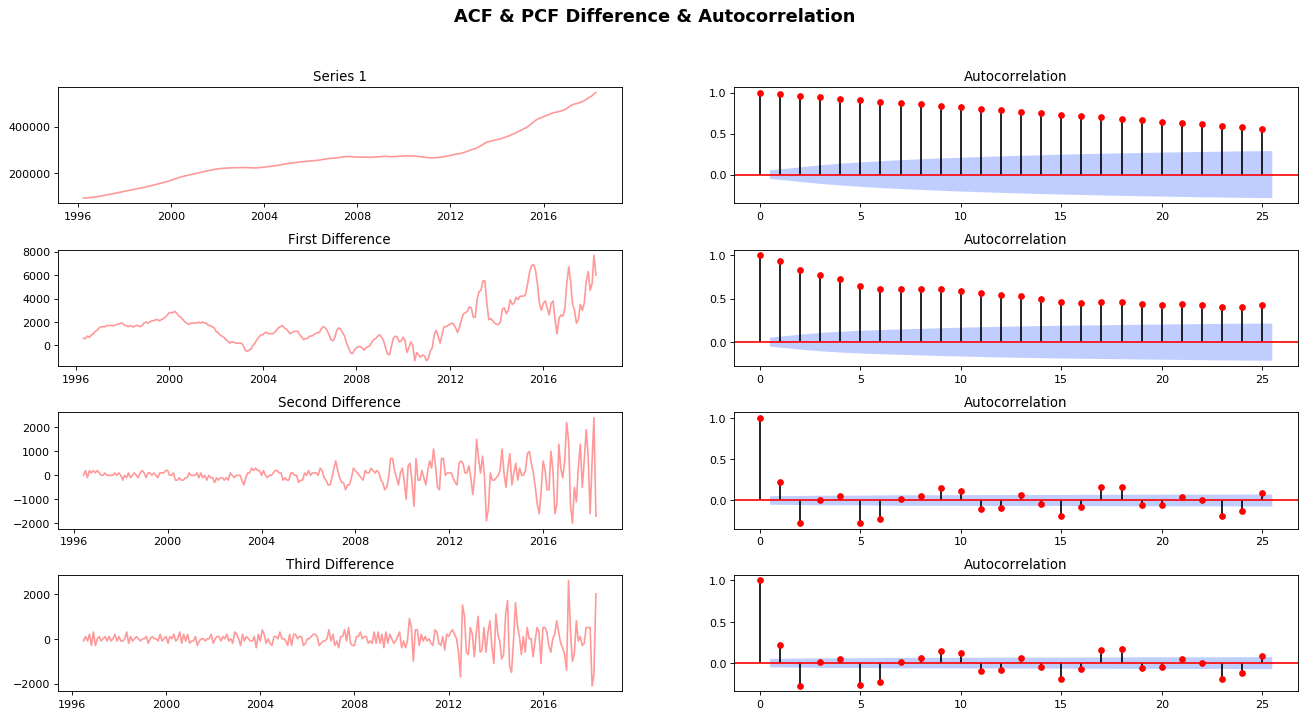

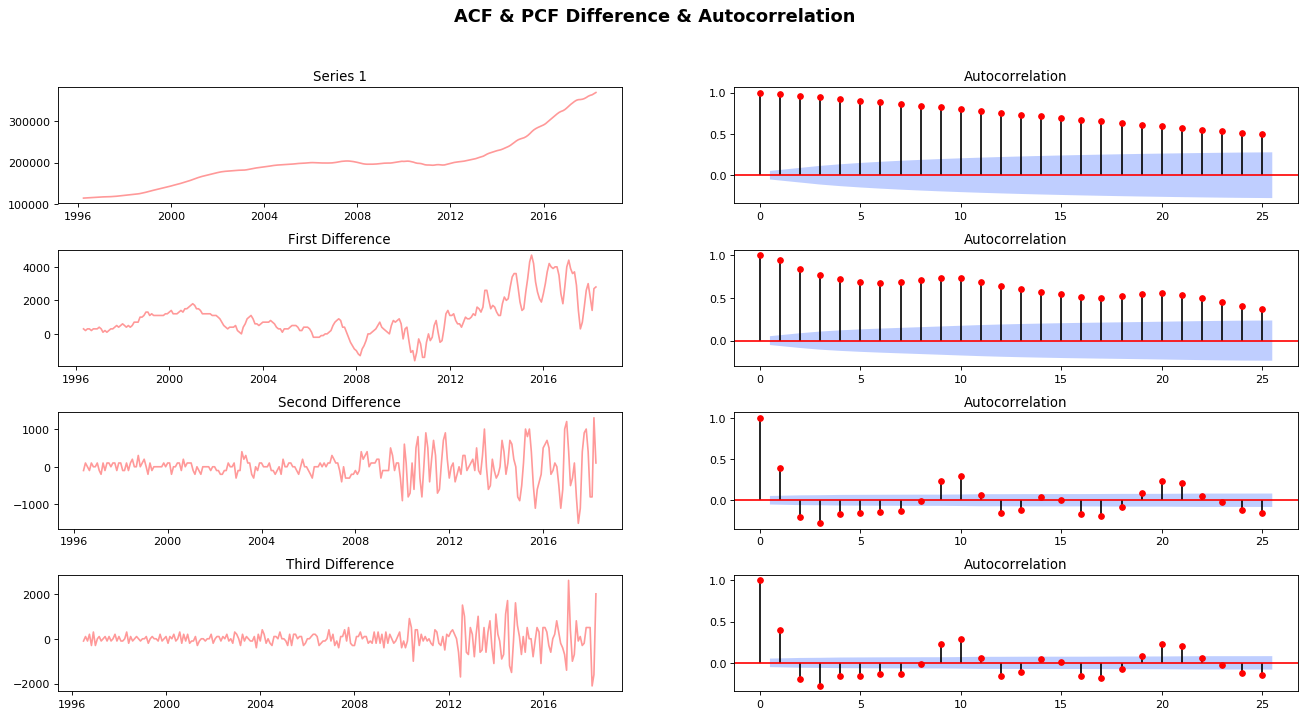

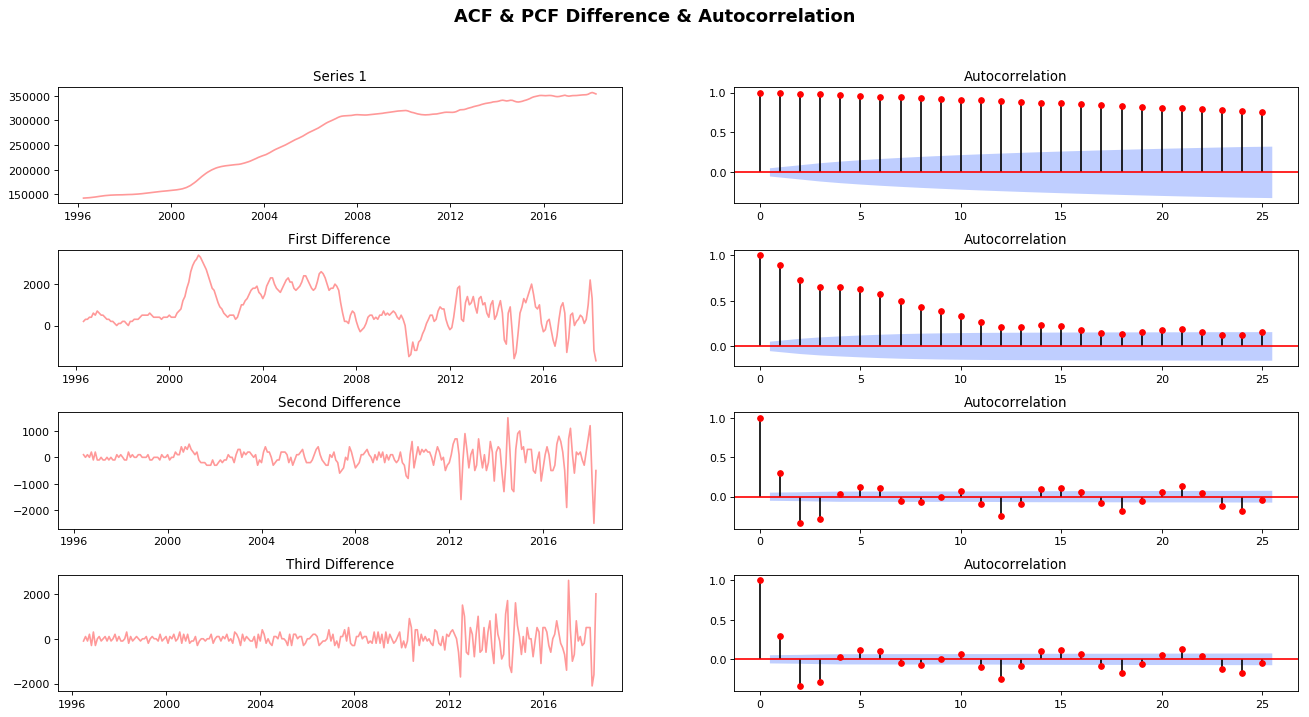

In [40]:
plt.rcParams.update({'figure.figsize': (20,10), 'figure.dpi':80})
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
for z in groupzip1:
    df3 = bullishdf[bullishdf.RegionName==z]
    fig, axes = plt.subplots(4,2)
    axes[0, 0].plot(df3.value,color='red',alpha=0.4); axes[0, 0].set_title('Series 1',fontsize=12)
    plot_acf(df3.value, ax=axes[0, 1], color='red',alpha=0.4)

    # 1st Differencing
    axes[1, 0].plot(df3.value.diff(), color='red',alpha=0.4); axes[1, 0].set_title('First Difference',fontsize=12)
    plot_acf(df3.value.diff().dropna(), ax=axes[1, 1], color='red',alpha=0.4)

    # 2nd Differencing
    axes[2, 0].plot(df3.value.diff().diff(), color='red',alpha=0.4); axes[2, 0].set_title('Second Difference',fontsize=12)
    plot_acf(df3.value.diff().diff().dropna(), color='red',alpha=0.4, ax=axes[2, 1])
    
     # 3nd Differencing
    axes[3, 0].plot(df_z.value.diff().diff().diff(), color='red',alpha=0.4); axes[3, 0].set_title('Third Difference',fontsize=12)
    plot_acf(df3.value.diff().diff().dropna(), ax=axes[3, 1],  color='red',alpha=0.4)

    fig.suptitle('ACF & PCF Difference & Autocorrelation ', fontsize=16, fontweight='bold')
    plt.subplots_adjust(hspace = 0.4 )
    plt.show()

In [41]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_process import arma_generate_sample

### Using a the statsmodels seasonal_decompose function, lets take a look at the top appreciating zipcodes over the years.  Then we will visualize these statistics for the top appreciating zip codes. 

# Lets see an indepth look as well as forcasting for our top zipcodes.
## 11216 - Brooklyn, NY

In [41]:
df_brooklyn= df[df['RegionName']==11216]

In [42]:
df_brooklyn.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
475,62027,11216,New York,NY,New York,Kings,476,146100.0,146600.0,147200.0,...,1452000,1506100,1553100,1567700,1559700,1545700,1540200,1553600,1578400,1598700


In [43]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro',
                                  'CountyName', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [44]:
df_bkln_melt = melt_data(df_brooklyn)

In [45]:
type(df_bkln_melt)

pandas.core.frame.DataFrame

In [46]:
df_bkln_melt.head()

,value
time,
1996-04-01,146100.0
1996-05-01,146600.0
1996-06-01,147200.0
1996-07-01,147700.0
1996-08-01,148400.0


In [76]:
import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))


# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(df_bkln_melt.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=365668322973.533
ARIMA(0, 0, 1) MSE=92979383240.669
ARIMA(0, 1, 0) MSE=240517502.238
ARIMA(0, 1, 1) MSE=84932910.609
ARIMA(0, 2, 0) MSE=93460236.731
ARIMA(0, 2, 1) MSE=55662024.964
ARIMA(1, 0, 0) MSE=321440890.865
ARIMA(1, 1, 0) MSE=88239375.993
ARIMA(1, 2, 0) MSE=73547047.639
ARIMA(1, 2, 1) MSE=55000358.642
ARIMA(2, 1, 1) MSE=44275810.705
ARIMA(2, 2, 0) MSE=44187095.894
ARIMA(2, 2, 1) MSE=46256595.619
ARIMA(4, 2, 0) MSE=41781343.844
ARIMA(4, 2, 1) MSE=40773690.112
ARIMA(6, 2, 0) MSE=42592067.840
ARIMA(8, 2, 0) MSE=39944856.726
ARIMA(10, 2, 0) MSE=40684570.363
Best ARIMA(8, 2, 0) MSE=39944856.726


In [47]:
model = ARIMA(df_bkln_melt, order=(8,2,0))
model_fit = model.fit(disp=0)

In [48]:
forecast = model_fit.forecast(24)

In [49]:
actual_foreacst = forecast[0]
forecast_conf_int = forecast[2]

In [50]:
df_bkln_melt.tail(4)

,value
time,
2018-01-01,1540200.0
2018-02-01,1553600.0
2018-03-01,1578400.0
2018-04-01,1598700.0


In [51]:
df_forecast = pd.DataFrame({'time': pd.date_range(start = '2018-05-01', end = '2020-04-01', freq = 'MS')})
df_forecast['forecast'] = actual_foreacst
df_forecast['lower_bound'] = forecast_conf_int[:, 0]
df_forecast['upper_bound'] = forecast_conf_int[:, 1]
df_forecast.set_index('time', inplace = True)

In [52]:
df_bkln = pd.concat([df_bkln_melt, df_forecast])

In [53]:
df_bkln.head()

,forecast,lower_bound,upper_bound,value
time,,,,
1996-04-01,NaN,NaN,NaN,146100.0
1996-05-01,NaN,NaN,NaN,146600.0
1996-06-01,NaN,NaN,NaN,147200.0
1996-07-01,NaN,NaN,NaN,147700.0
1996-08-01,NaN,NaN,NaN,148400.0


Text(0.5, 1.0, 'Forecast for Brooklyn, NY 11216')

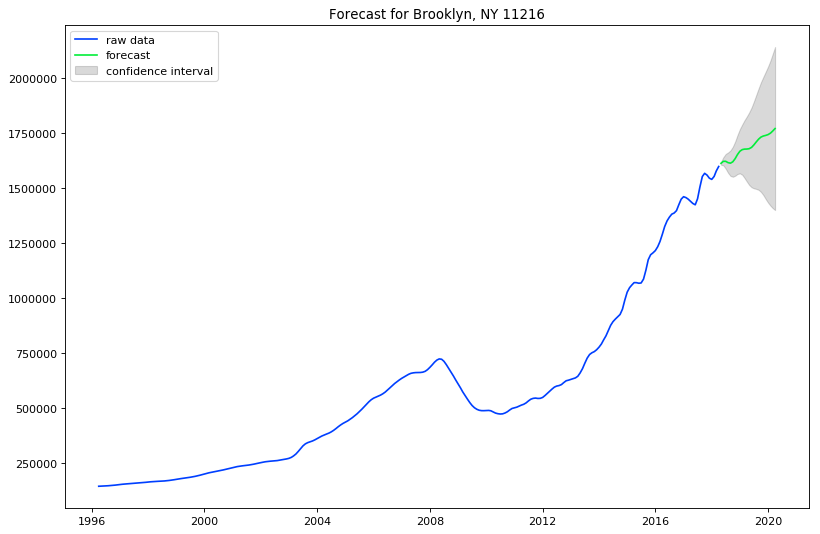

In [56]:
fig = plt.figure(figsize = (12, 8))

plt.plot(df_bkln['value'], label = 'raw data')
plt.plot(df_bkln['forecast'], label = 'forecast')
plt.fill_between(df_bkln.index, df_bkln['lower_bound'], df_bkln['upper_bound'], color="k", alpha=.15,
                label = 'confidence interval')
plt.legend(loc = 'upper left')
plt.title('Forecast for Brooklyn, NY 11216')

In [58]:
forcast_2_years = df_bkln.loc['2020-04-01', 'forecast']
forcast_lower = df_bkln.loc['2020-04-01', 'lower_bound']
forcast_upper = df_bkln.loc['2020-04-01', 'upper_bound']

In [59]:
last_price = df_bkln_melt.loc['2018-04-01', 'value']

In [60]:
predicted_bkln = (forcast_2_years - last_price) / last_price
print(f' Investors could expect a  {np.round(predicted_bkln * 100, 4)}% return on investment in Brooklyn, NY 12116')

 Investors could expect a  10.7882% return on investment in Brooklyn, NY 12116


In [62]:
upside_bkln = (forcast_upper - last_price) / last_price
print(f'The upside potential of this investment can reach up to a  {np.round(upside_bkln * 100, 4)}% return on investment in Brooklyn, NY 11216')


The upside potential of this investment can reach up to a  33.9617% return on investment in Brooklyn, NY 11216


In [63]:
downside_bkln = (forcast_lower - last_price) / last_price
print(f'The risks associated with this investment could give the firm  {np.round(downside_bkln * 100, 4)}% loss on investment in Brooklyn, NY 11216')


The risks associated with this investment could give the firm  -12.3852% loss on investment in Brooklyn, NY 11216


## 20003 - Washington, DC

In [42]:
df_DC= df[df['RegionName']==20003]

In [43]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro',
                                  'CountyName', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [44]:
df_DC_melt = melt_data(df_DC)

In [45]:
df_DC_melt.head()

,value
time,
1996-04-01,130000.0
1996-05-01,130100.0
1996-06-01,130200.0
1996-07-01,130400.0
1996-08-01,130600.0


In [46]:
import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))


# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(df_DC_melt.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=71846220569.828
ARIMA(0, 0, 1) MSE=18150171893.144
ARIMA(0, 1, 0) MSE=5177222.041
ARIMA(0, 1, 1) MSE=2648196.036
ARIMA(0, 2, 0) MSE=2392508.405
ARIMA(0, 2, 1) MSE=1823260.000
ARIMA(1, 0, 0) MSE=12472681.857
ARIMA(1, 1, 0) MSE=2289341.902
ARIMA(1, 1, 2) MSE=1375900.826
ARIMA(1, 2, 0) MSE=2028156.225
ARIMA(1, 2, 1) MSE=1814477.911
ARIMA(2, 0, 0) MSE=2356999.489
ARIMA(2, 0, 2) MSE=1489576.718
ARIMA(2, 1, 0) MSE=1807351.429
ARIMA(2, 1, 1) MSE=1651377.433
ARIMA(2, 1, 2) MSE=1222421.123
ARIMA(2, 2, 0) MSE=1502789.910
ARIMA(2, 2, 1) MSE=1607307.672
ARIMA(4, 0, 0) MSE=1484102.301
ARIMA(4, 0, 1) MSE=1582992.319
ARIMA(4, 0, 2) MSE=1301110.306
ARIMA(4, 1, 1) MSE=1592993.058
ARIMA(4, 1, 2) MSE=1396775.999
ARIMA(4, 2, 0) MSE=1674224.044
ARIMA(6, 0, 0) MSE=1713385.857
ARIMA(6, 2, 0) MSE=1428230.930
ARIMA(8, 0, 0) MSE=1414339.409
ARIMA(8, 2, 0) MSE=1483971.561
ARIMA(8, 2, 1) MSE=1479833.372
Best ARIMA(2, 1, 2) MSE=1222421.123


In [48]:
model2 = ARIMA(df_DC_melt, order=(2,1,2))

In [50]:
model_fit2 = model2.fit(disp=0)

In [51]:
forecast2 = model_fit2.forecast(24)

In [53]:
actual_forcast2 = forecast2[0]
forecast_conf_int2 = forecast2[2]

In [54]:
df_DC_melt.tail()

,value
time,
2017-12-01,814600.0
2018-01-01,815300.0
2018-02-01,817300.0
2018-03-01,820200.0
2018-04-01,820200.0


In [55]:
df_forecast = pd.DataFrame({'time': pd.date_range(start = '2018-05-01', end = '2020-04-01', freq = 'MS')})
df_forecast['forecast'] = actual_forcast2
df_forecast['lower_bound'] = forecast_conf_int2[:, 0]
df_forecast['upper_bound'] = forecast_conf_int2[:, 1]
df_forecast.set_index('time', inplace = True)

In [56]:
df_DC = pd.concat([df_DC_melt, df_forecast])

In [57]:
df_DC.head()

,forecast,lower_bound,upper_bound,value
time,,,,
1996-04-01,NaN,NaN,NaN,130000.0
1996-05-01,NaN,NaN,NaN,130100.0
1996-06-01,NaN,NaN,NaN,130200.0
1996-07-01,NaN,NaN,NaN,130400.0
1996-08-01,NaN,NaN,NaN,130600.0


Text(0.5, 1.0, 'Forecast for Washington, DC 20003')

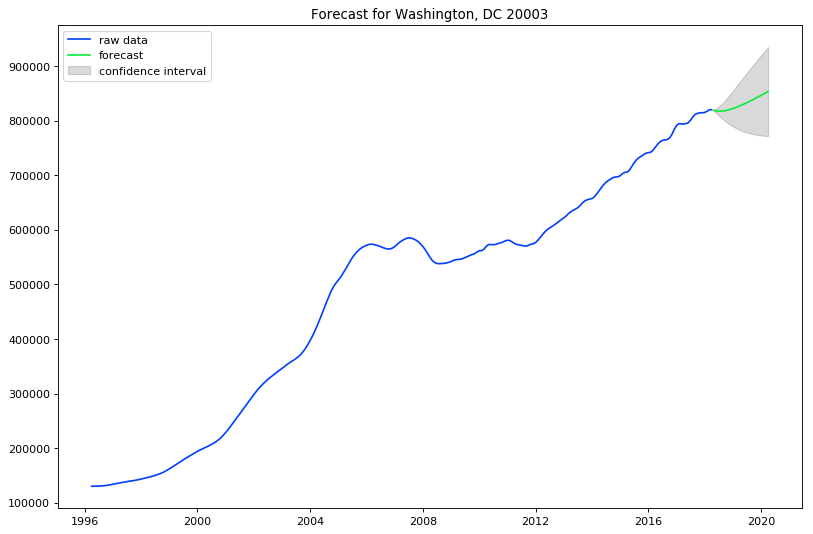

In [58]:
fig = plt.figure(figsize = (12, 8))

plt.plot(df_DC['value'], label = 'raw data')
plt.plot(df_DC['forecast'], label = 'forecast')
plt.fill_between(df_DC.index, df_DC['lower_bound'], df_DC['upper_bound'], color="k", alpha=.15,
                label = 'confidence interval')
plt.legend(loc = 'upper left')
plt.title('Forecast for Washington, DC 20003')

In [59]:
forcast_2_years1 = df_DC.loc['2020-04-01', 'forecast']
forcast_lower1 = df_DC.loc['2020-04-01', 'lower_bound']
forcast_upper1 = df_DC.loc['2020-04-01', 'upper_bound']

In [60]:
last_price1 = df_DC.loc['2018-04-01', 'value']

In [61]:
predicted_DC = (forcast_2_years1 - last_price1) / last_price1
print(f' Investors could expect a  {np.round(predicted_DC * 100, 4)}% return on investment in Washington, DC 2003')

 Investors could expect a  4.0676% return on investment in Washington, DC 2003


In [62]:
upside_dc = (forcast_upper1 - last_price1) / last_price1
print(f'The upside potential of this investment can reach up to a  {np.round(upside_dc * 100, 4)}% return on investment in Washington DC 2003')


The upside potential of this investment can reach up to a  14.0211% return on investment in Washington DC 2003


In [63]:
downside_dc = (forcast_lower1 - last_price1) / last_price1
print(f'The risks associated with this investment could give the firm  {np.round(downside_dc * 100, 4)}% loss on investment in Washington, DC 20003')


The risks associated with this investment could give the firm  -5.886% loss on investment in Washington, DC 20003


## Nashville, TN 37206

In [64]:
df_TN= df[df['RegionName']==37206]

In [65]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro',
                                  'CountyName', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [66]:
df_TN_melt = melt_data(df_TN)

In [67]:
df_TN_melt.head()

,value
time,
1996-04-01,67300.0
1996-05-01,67300.0
1996-06-01,67300.0
1996-07-01,67400.0
1996-08-01,67500.0


In [68]:
import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))


# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(df_TN_melt.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=13054980282.011
ARIMA(0, 0, 1) MSE=3307681116.878
ARIMA(0, 1, 0) MSE=5262053.114
ARIMA(0, 1, 1) MSE=1556643.459
ARIMA(0, 2, 0) MSE=583933.082
ARIMA(0, 2, 1) MSE=460247.738
ARIMA(0, 2, 2) MSE=445992.816
ARIMA(1, 0, 0) MSE=7982481.282
ARIMA(1, 1, 0) MSE=579861.187
ARIMA(1, 2, 0) MSE=562802.701
ARIMA(1, 2, 1) MSE=457385.916
ARIMA(1, 2, 2) MSE=430562.738
ARIMA(2, 1, 0) MSE=550981.218
ARIMA(2, 2, 0) MSE=427518.636
ARIMA(2, 2, 1) MSE=415811.662
ARIMA(2, 2, 2) MSE=444716.705
ARIMA(4, 1, 0) MSE=426591.137
ARIMA(4, 2, 0) MSE=434858.311
ARIMA(4, 2, 1) MSE=445829.244
ARIMA(6, 1, 0) MSE=446168.403
ARIMA(6, 2, 0) MSE=453045.203
ARIMA(6, 2, 1) MSE=453050.380
ARIMA(8, 1, 0) MSE=457540.632
ARIMA(8, 2, 0) MSE=462380.559
ARIMA(8, 2, 1) MSE=466515.577
Best ARIMA(2, 2, 1) MSE=415811.662


In [97]:
model3 = ARIMA(df_TN_melt, order=(2,2,1))

In [98]:
model_fit3 = model3.fit(disp=0)

In [99]:
forecast3 = model_fit3.forecast(24)

In [100]:
actual_forcast3 = forecast3[0]
forecast_conf_int3 = forecast3[2]

In [101]:
df_TN_melt.tail()

,value
time,
2017-12-01,336600.0
2018-01-01,336500.0
2018-02-01,337900.0
2018-03-01,340900.0
2018-04-01,342800.0


In [102]:
df_forecast = pd.DataFrame({'time': pd.date_range(start = '2018-05-01', end = '2020-04-01', freq = 'MS')})
df_forecast['forecast'] = actual_forcast3
df_forecast['lower_bound'] = forecast_conf_int3[:, 0]
df_forecast['upper_bound'] = forecast_conf_int3[:, 1]
df_forecast.set_index('time', inplace = True)

In [103]:
df_TN = pd.concat([df_TN_melt, df_forecast])

In [104]:
df_TN.head()

,forecast,lower_bound,upper_bound,value
time,,,,
1996-04-01,NaN,NaN,NaN,67300.0
1996-05-01,NaN,NaN,NaN,67300.0
1996-06-01,NaN,NaN,NaN,67300.0
1996-07-01,NaN,NaN,NaN,67400.0
1996-08-01,NaN,NaN,NaN,67500.0


Text(0.5, 1.0, 'Forecast for Nashville, TN 37206')

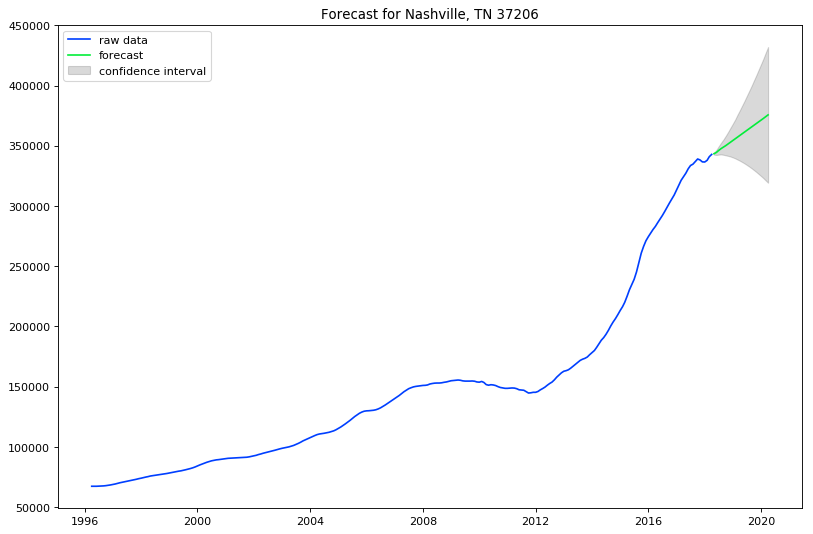

In [105]:
fig = plt.figure(figsize = (12, 8))

plt.plot(df_TN['value'], label = 'raw data')
plt.plot(df_TN['forecast'], label = 'forecast')
plt.fill_between(df_TN.index, df_TN['lower_bound'], df_TN['upper_bound'], color="k", alpha=.15,
                label = 'confidence interval')
plt.legend(loc = 'upper left')
plt.title('Forecast for Nashville, TN 37206')

In [106]:
forcast_2_years3 = df_TN.loc['2020-04-01', 'forecast']
forcast_lower3 = df_TN.loc['2020-04-01', 'lower_bound']
forcast_upper3 = df_TN.loc['2020-04-01', 'upper_bound']

In [107]:
last_price3 = df_TN.loc['2018-04-01', 'value']

In [108]:
predicted_TN = (forcast_2_years3 - last_price3) / last_price3
print(f' Investors could expect a  {np.round(predicted_TN * 100, 4)}% return on investment in Nashville, TN 37206')

 Investors could expect a  9.5739% return on investment in Nashville, TN 37206


In [109]:
upside_TN = (forcast_upper3 - last_price3) / last_price3
print(f'The upside potential of this investment can reach up to a  {np.round(upside_TN * 100, 4)}% return on investment in Nashville, TN 37206')


The upside potential of this investment can reach up to a  26.0172% return on investment in Nashville, TN 37206


In [110]:
downside_TN = (forcast_lower3 - last_price3) / last_price3
print(f'The risks associated with this investment could give the firm  {np.round(downside_TN * 100, 4)}% loss on investment in Nashville, TN 37206')


The risks associated with this investment could give the firm  -6.8694% loss on investment in Nashville, TN 37206


## Denver, CO 80210

In [39]:
df_CO= df[df['RegionName']==80210]

In [40]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro',
                                  'CountyName', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [41]:
df_CO_melt = melt_data(df_CO)

In [42]:
df_CO_melt.head()

,value
time,
1996-04-01,150600.0
1996-05-01,151400.0
1996-06-01,152400.0
1996-07-01,153400.0
1996-08-01,154500.0


In [43]:
import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))


# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(df_CO_melt.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=24796651727.910
ARIMA(0, 0, 1) MSE=6316053930.947
ARIMA(0, 1, 0) MSE=7924802.518
ARIMA(0, 1, 1) MSE=2440226.555
ARIMA(0, 2, 0) MSE=926243.434
ARIMA(0, 2, 1) MSE=791205.654
ARIMA(0, 2, 2) MSE=765137.217
ARIMA(1, 0, 0) MSE=15126038.636
ARIMA(1, 1, 0) MSE=913462.773
ARIMA(1, 1, 1) MSE=755580.744
ARIMA(1, 1, 2) MSE=746516.180
ARIMA(1, 2, 0) MSE=888326.650
ARIMA(1, 2, 1) MSE=774318.766
ARIMA(2, 0, 0) MSE=940291.504
ARIMA(2, 1, 0) MSE=854623.299
ARIMA(2, 1, 1) MSE=753158.363
ARIMA(2, 2, 0) MSE=792339.686
ARIMA(2, 2, 1) MSE=750269.836
ARIMA(4, 1, 0) MSE=742626.891
ARIMA(4, 1, 1) MSE=735569.871
ARIMA(4, 2, 0) MSE=728869.730
ARIMA(4, 2, 1) MSE=680828.067
ARIMA(6, 0, 0) MSE=746786.156
ARIMA(6, 1, 0) MSE=687435.364
ARIMA(6, 1, 1) MSE=716459.930
ARIMA(6, 2, 0) MSE=697970.477
ARIMA(8, 1, 0) MSE=709924.540
ARIMA(8, 1, 1) MSE=710061.426
ARIMA(8, 2, 0) MSE=709970.629
ARIMA(8, 2, 1) MSE=712370.569
Best ARIMA(4, 2, 1) MSE=680828.067


In [44]:
model4 = ARIMA(df_CO_melt, order=(4,2,1))

In [45]:
model_fit4 = model4.fit(disp=0)

In [46]:
forecast4 = model_fit4.forecast(24)

In [47]:
actual_forcast4 = forecast4[0]
forecast_conf_int4 = forecast4[2]

In [48]:
df_forecast = pd.DataFrame({'time': pd.date_range(start = '2018-05-01', end = '2020-04-01', freq = 'MS')})
df_forecast['forecast'] = actual_forcast4
df_forecast['lower_bound'] = forecast_conf_int4[:, 0]
df_forecast['upper_bound'] = forecast_conf_int4[:, 1]
df_forecast.set_index('time', inplace = True)

In [49]:
df_CO = pd.concat([df_CO_melt, df_forecast])

Text(0.5, 1.0, 'Forecast for Denver, CO 80210')

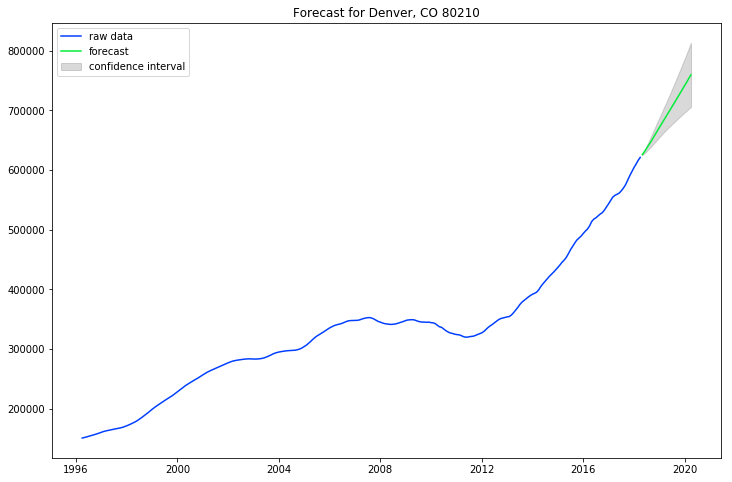

In [51]:
fig = plt.figure(figsize = (12, 8))

plt.plot(df_CO['value'], label = 'raw data')
plt.plot(df_CO['forecast'], label = 'forecast')
plt.fill_between(df_CO.index, df_CO['lower_bound'], df_CO['upper_bound'], color="k", alpha=.15,
                label = 'confidence interval')
plt.legend(loc = 'upper left')
plt.title('Forecast for Denver, CO 80210')

In [52]:
forcast_2_years4 = df_CO.loc['2020-04-01', 'forecast']
forcast_lower4 = df_CO.loc['2020-04-01', 'lower_bound']
forcast_upper4 = df_CO.loc['2020-04-01', 'upper_bound']

In [53]:
last_price4 = df_CO.loc['2018-04-01', 'value']

In [55]:
predicted_CO = (forcast_2_years4 - last_price4) / last_price4
print(f' Investors could expect a  {np.round(predicted_CO * 100, 4)}% return on investment in Denver, CO 80210')

 Investors could expect a  22.3036% return on investment in Denver, CO 80210


In [56]:
upside_CO = (forcast_upper4 - last_price4) / last_price4
print(f'The upside potential of this investment can reach up to a  {np.round(upside_CO * 100, 4)}% return on investment in Denver, CO 80210')


The upside potential of this investment can reach up to a  30.9601% return on investment in Denver, CO 80210


In [57]:
downside_CO = (forcast_lower4 - last_price4) / last_price4
print(f'The risks associated with this investment could give the firm  {np.round(downside_CO * 100, 4)}% loss on investment in Denver, CO 80210')

The risks associated with this investment could give the firm  13.647% loss on investment in Denver, CO 80210


### Top performing areas:

#### 11216 - Brooklyn, NY
#### 20003 - Washington, DC
#### 37204 - Nashville, TN
#### 37206 - Nashville, TN
#### 80210 - Denver, CO
#### 80211 - Denver, CO
#### 80521 - Fort Collins, CO
#### 99502 - Anchorage, AK

## Investment Advice:

### - Invest in the Denver area as well as do more research on other zipcodes in Colorado              as they had the highest appreciation rate as a state and some of the top appreciating            zip codes.

### - Invest in Nashville, TN as it has shown great appreciation rates and Tennessee as a                whole has not appreciated significantly so it could lead to higher ROI.

### - Look for opportunities in Brooklyn neighborhoods, however the prices are already so            high so it leaves less opportunity for ROI.

### - Anchorage, AK has had great returns over the years with Alaska not appreciating that            much as a state.  Good opportunity investment in Alaska. 